In [36]:
import aqdefreader as aqdr
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
def load_data(data_folder_path: str) -> pd.DataFrame:
    data_file_paths = glob.glob(f"{data_folder_path}/*.dfq")
    data = defaultdict(list)

    for idx, path in enumerate(data_file_paths):
        if idx % 100 == 0:
            print(f"Processing file {idx+1}/{len(data_file_paths)}: {path}")
        try:
            dfq_data = aqdr.read_dfq_file(path)
            part: aqdr.part.Part = dfq_data.get_part(0)
            for characteristic in part.get_characteristics():
                data[characteristic.get_data('K2003')].extend([measurement.value for measurement in characteristic.get_measurements()])   
        
        except Exception as e:
            print(f"Error reading file {path}: {e}")
            continue

    return pd.DataFrame(data)


In [59]:
def plot_data(parts_df: pd.DataFrame, sigma_factor: float) -> None:
    probe_cols = [f"Probe {i}" for i in range(1, 7)]
    track_cols = [f"Track {i}-{i+3}" for i in range(1, 4)]

    # --- Probe Data Plotting and Statistics ---
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # 2 rows for line plots and histograms

    probe_stats = {}
    for i, probe in enumerate(probe_cols):
        data = parts_df[probe].dropna()
        mean = round(stats.describe(data).mean, 3)
        sigma_limits = round(sigma_factor * stats.describe(data).variance ** 0.5, 3)
        upper_limit = round(mean + sigma_limits, 3)
        lower_limit = round(mean - sigma_limits, 3)
        x_pos = int(i/3)*2
        y_pos = i%3

        # Line plot
        axes[x_pos, y_pos].plot(parts_df.index, parts_df[probe], label=probe)
        axes[x_pos, y_pos].axhline(y=upper_limit, color='r', linestyle='--', label=f'Upper Limit ({upper_limit:.4f})')
        axes[x_pos, y_pos].axhline(y=lower_limit, color='r', linestyle='--', label=f'Lower Limit ({lower_limit:.4f})')
        axes[x_pos, y_pos].set_title(probe)
        axes[x_pos, y_pos].legend()
        axes[x_pos, y_pos].grid(True)

        # Histogram
        axes[x_pos+1, y_pos].hist(data, bins=20, edgecolor='black')  # Adjust bins as needed
        axes[x_pos+1, y_pos].set_title(f'{probe} Histogram')
        axes[x_pos+1, y_pos].set_xlabel('Value')
        axes[x_pos+1, y_pos].set_ylabel('Frequency')

        probe_stats[probe] = {'Mean': mean, f'{sigma_factor}x Sigma': sigma_limits, 
                             'Upper Limit': upper_limit, 'Lower Limit': lower_limit}

    fig.suptitle("Probe Measurements", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlapping
    plt.show()
    probe_stats_df = pd.DataFrame(probe_stats).transpose()
    print(probe_stats_df)


    # --- Track Data Plotting and Statistics ---
    fig, axes = plt.subplots(2, len(track_cols), figsize=(15, 10), sharey='row') # Share y-axis within rows

    track_stats = {}
    for i, track in enumerate(track_cols):
        data = parts_df[track].dropna()
        mean = round(stats.describe(data).mean, 3)
        sigma_limits = round(sigma_factor * stats.describe(data).variance ** 0.5, 3)
        upper_limit = round(mean + sigma_limits, 3)
        lower_limit = round(mean - sigma_limits, 3)

        # Line plot
        axes[0, i].plot(parts_df.index, parts_df[track], label=track)
        axes[0, i].axhline(y=upper_limit, color='r', linestyle='--', label=f'Upper Limit ({upper_limit:.4f})')
        axes[0, i].axhline(y=lower_limit, color='r', linestyle='--', label=f'Lower Limit ({lower_limit:.4f})')

        axes[0, i].set_title(track)
        axes[0, i].legend()
        axes[0, i].grid(True)

         # Histogram
        axes[1, i].hist(data, bins=20, edgecolor='black')
        axes[1, i].set_title(f'{track} Histogram')
        axes[1, i].set_xlabel('Value')
        axes[1, i].set_ylabel('Frequency')




        track_stats[track] = {'Mean': mean, f'{sigma_factor}x Sigma': sigma_limits, 
                              'Upper Limit': upper_limit, 'Lower Limit': lower_limit}

    fig.suptitle(f"Track Data with {sigma_factor} Sigma Limits", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
    plt.show()

    track_stats_df = pd.DataFrame(track_stats).transpose()
    print(track_stats_df)



Processing file 1/2: C:/Users/ckunde/Desktop/Scripts/Data/2024-12-06_1900_inners_measurements/0910\P(IXP 1900 IR_six probe_DL_Rev01)_OP(IXP)_CS(IXP InnerRace [1])_TS(20241209125625525).dfq


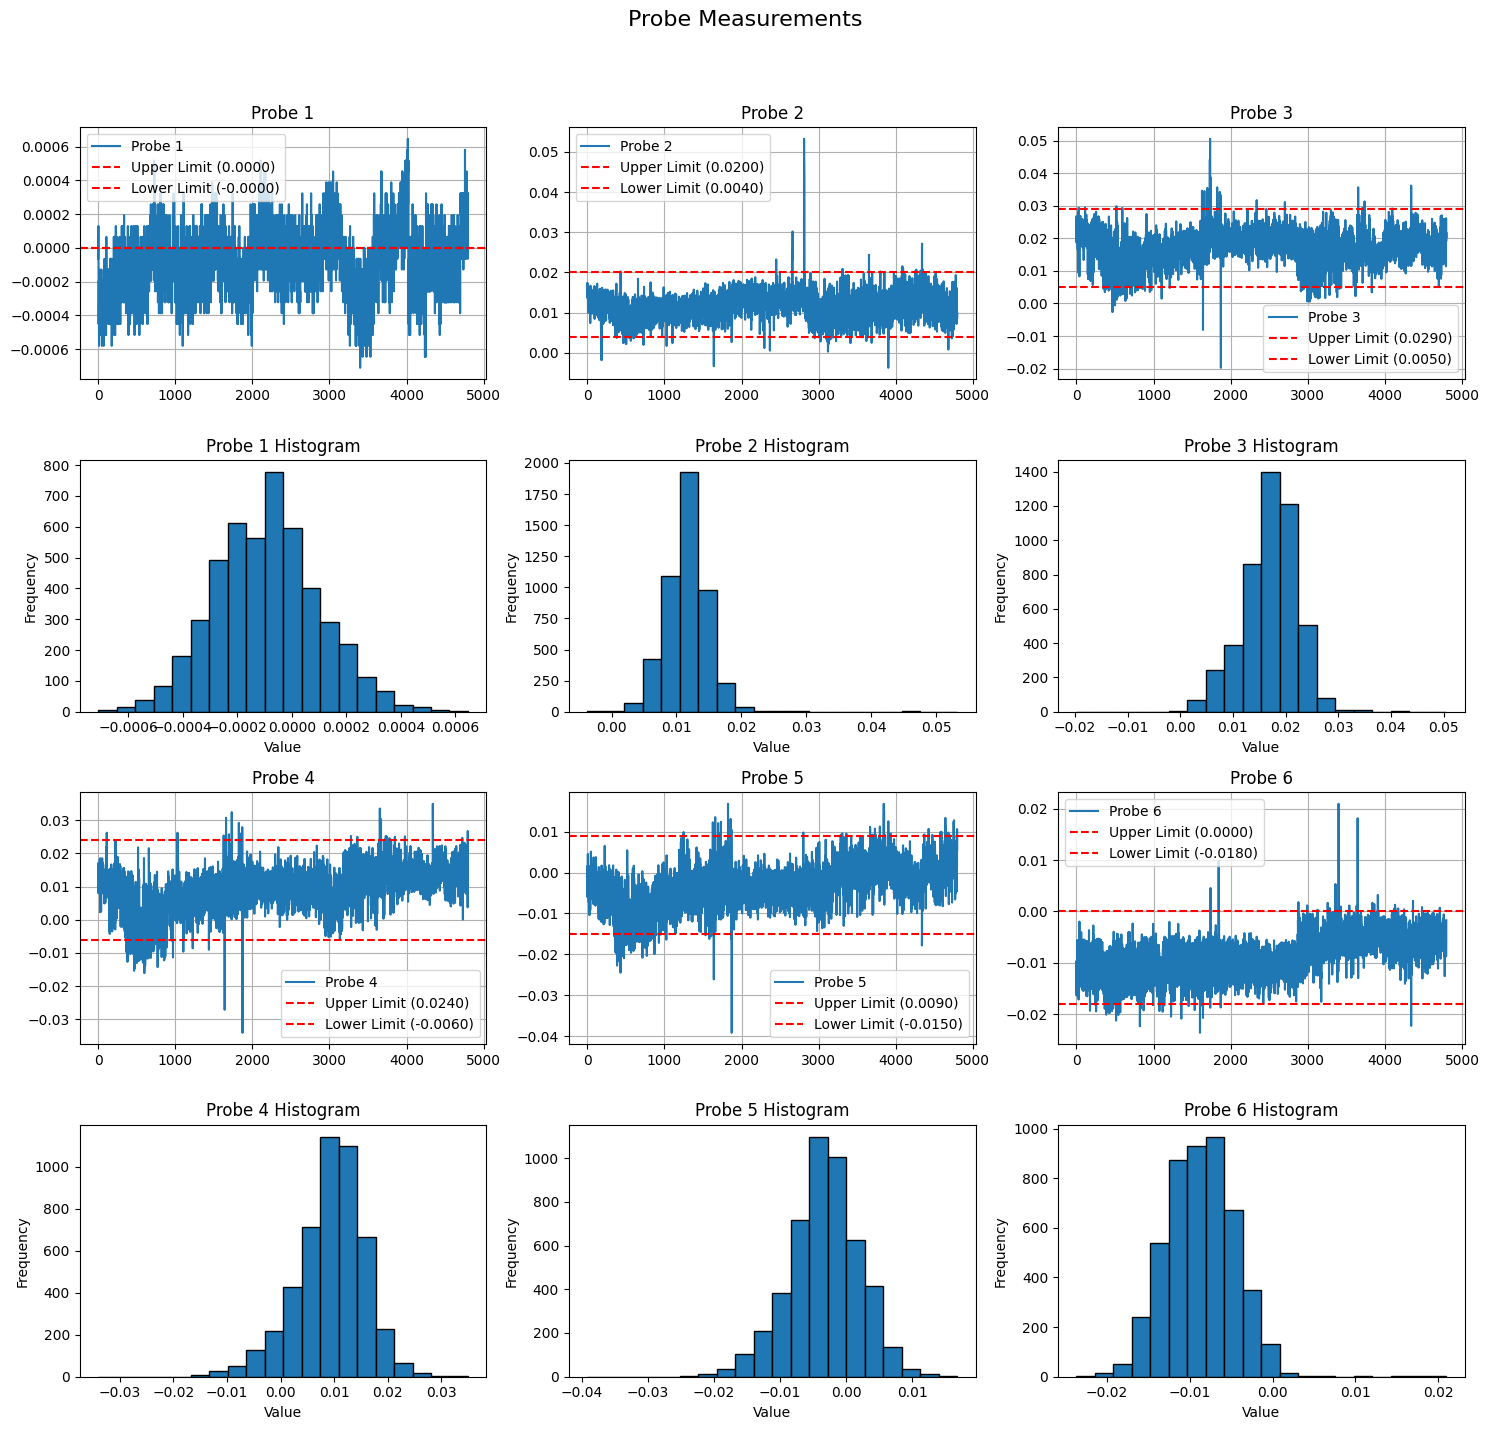

          Mean  2.3x Sigma  Upper Limit  Lower Limit
Probe 1 -0.000       0.000        0.000       -0.000
Probe 2  0.012       0.008        0.020        0.004
Probe 3  0.017       0.012        0.029        0.005
Probe 4  0.009       0.015        0.024       -0.006
Probe 5 -0.003       0.012        0.009       -0.015
Probe 6 -0.009       0.009        0.000       -0.018


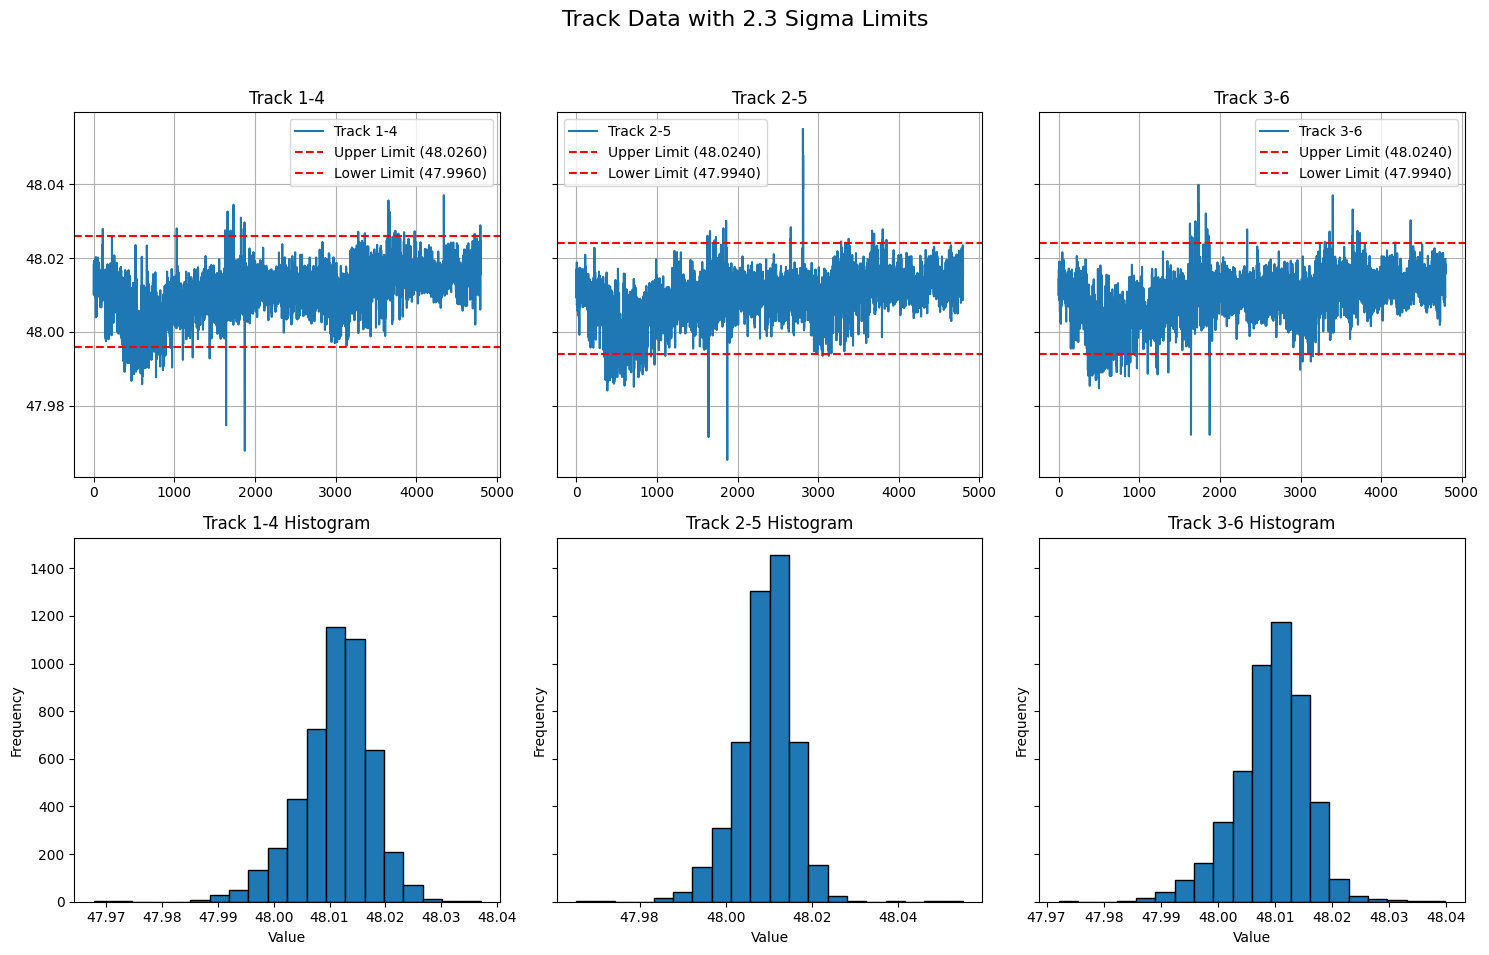

             Mean  2.3x Sigma  Upper Limit  Lower Limit
Track 1-4  48.011       0.015       48.026       47.996
Track 2-5  48.009       0.015       48.024       47.994
Track 3-6  48.009       0.015       48.024       47.994


In [60]:
# Load the data
inners_path = "C:/Users/ckunde/Desktop/Scripts/Data/2024-12-06_1900_inners_measurements/0910"
inners_df = load_data(inners_path)
# Plot the data
plot_data(inners_df, sigma_factor=2.3)

Processing file 1/8191: C:/Users/ckunde/Desktop/Scripts/Data/SPCGeraet\P(OR IXP19000_DL_rev00)_OP(IVL)_CS(IVL OuterRace [1])_TS(20241202113056846).dfq
Processing file 101/8191: C:/Users/ckunde/Desktop/Scripts/Data/SPCGeraet\P(OR IXP19000_DL_rev00)_OP(IVL)_CS(IVL OuterRace [1])_TS(20241202115341333).dfq
Processing file 201/8191: C:/Users/ckunde/Desktop/Scripts/Data/SPCGeraet\P(OR IXP19000_DL_rev00)_OP(IVL)_CS(IVL OuterRace [1])_TS(20241202121746359).dfq
Processing file 301/8191: C:/Users/ckunde/Desktop/Scripts/Data/SPCGeraet\P(OR IXP19000_DL_rev00)_OP(IVL)_CS(IVL OuterRace [1])_TS(20241202124342867).dfq
Processing file 401/8191: C:/Users/ckunde/Desktop/Scripts/Data/SPCGeraet\P(OR IXP19000_DL_rev00)_OP(IVL)_CS(IVL OuterRace [1])_TS(20241202131732279).dfq
Processing file 501/8191: C:/Users/ckunde/Desktop/Scripts/Data/SPCGeraet\P(OR IXP19000_DL_rev00)_OP(IVL)_CS(IVL OuterRace [1])_TS(20241202134215023).dfq
Processing file 601/8191: C:/Users/ckunde/Desktop/Scripts/Data/SPCGeraet\P(OR IXP190

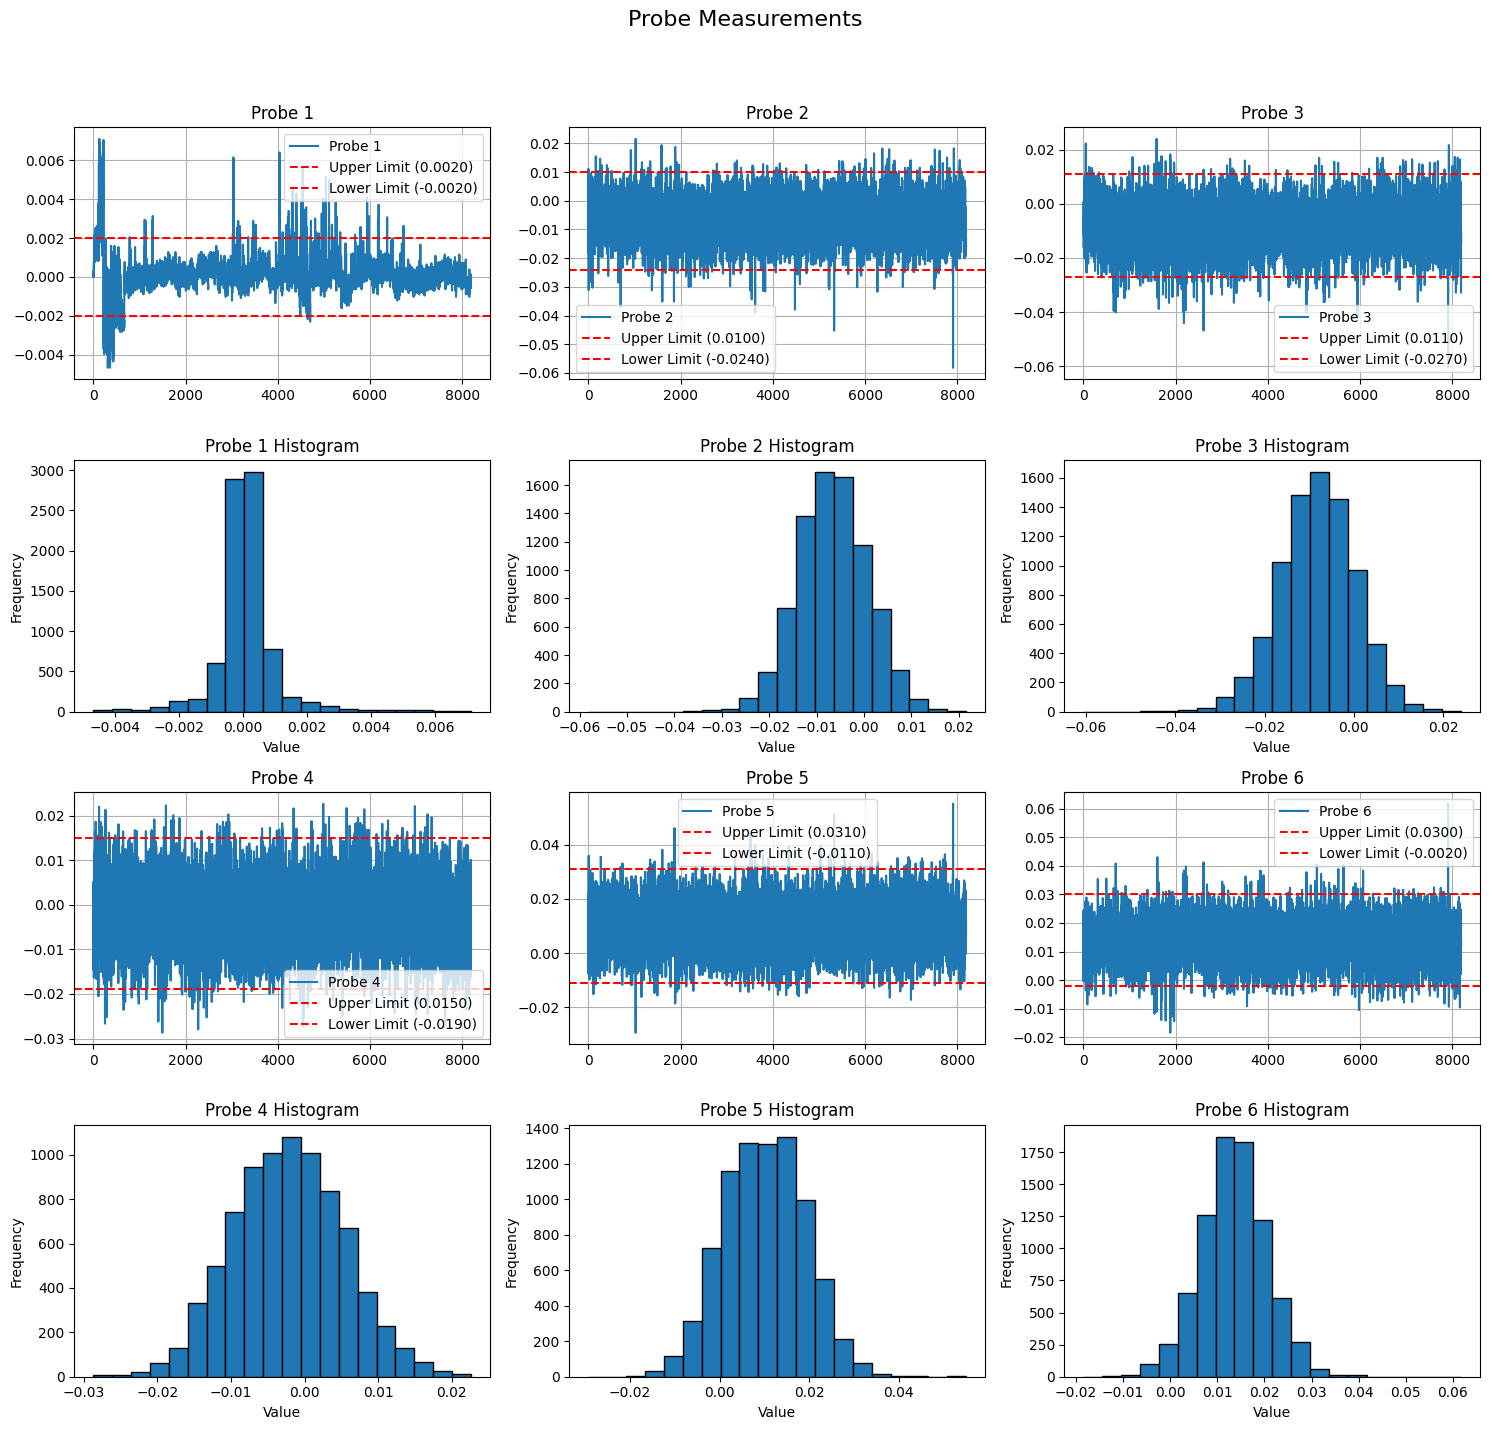

          Mean  2.3x Sigma  Upper Limit  Lower Limit
Probe 1  0.000       0.002        0.002       -0.002
Probe 2 -0.007       0.017        0.010       -0.024
Probe 3 -0.008       0.019        0.011       -0.027
Probe 4 -0.002       0.017        0.015       -0.019
Probe 5  0.010       0.021        0.031       -0.011
Probe 6  0.014       0.016        0.030       -0.002


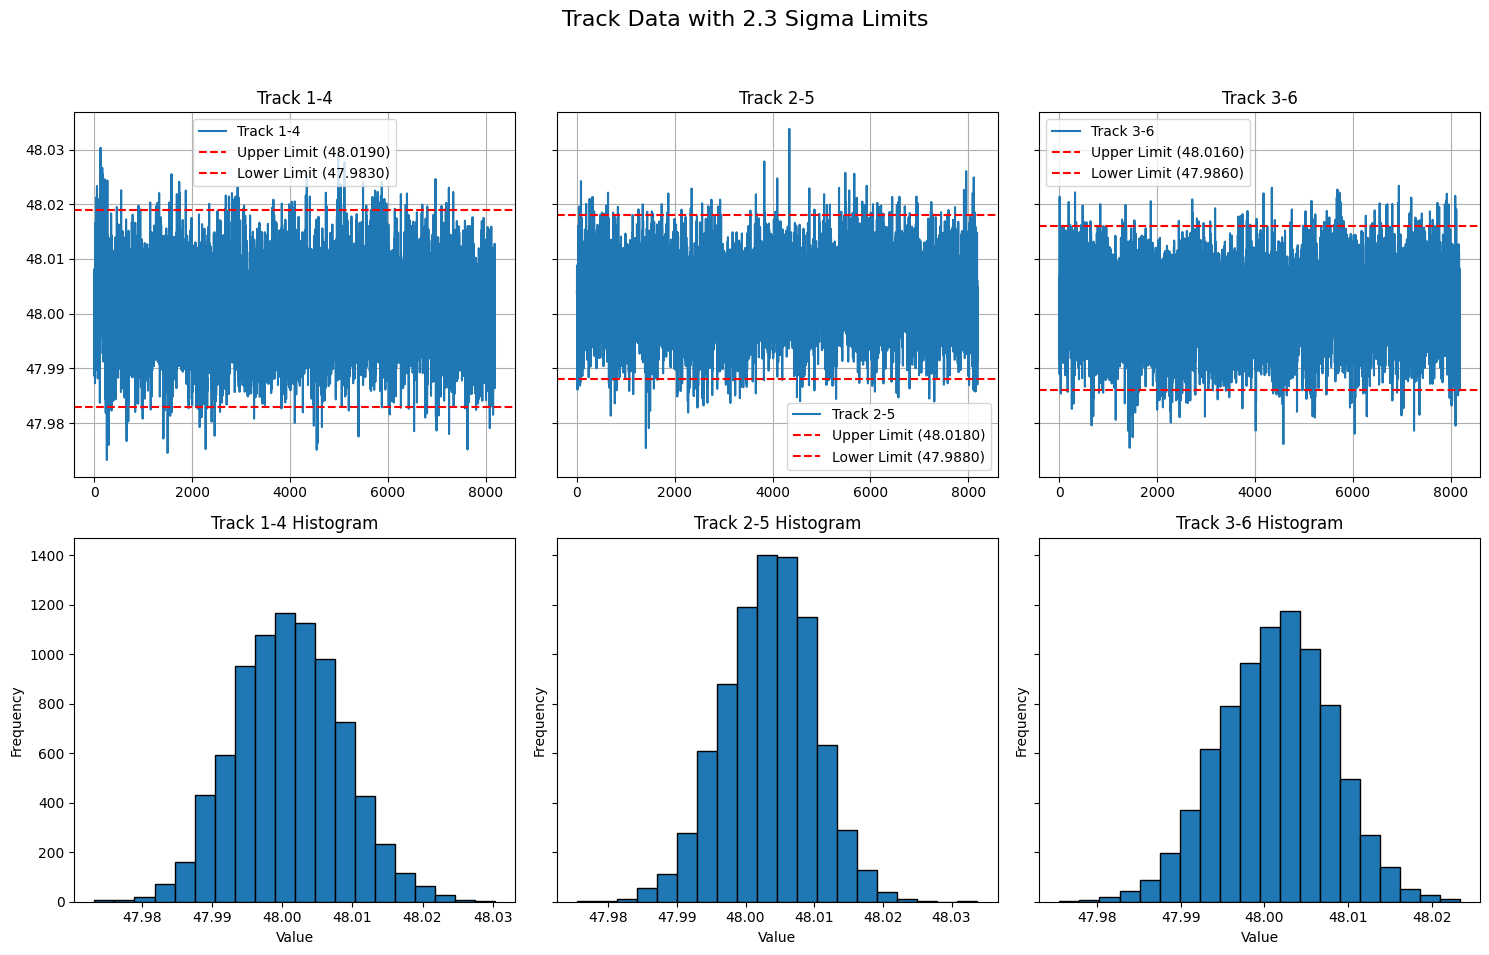

             Mean  2.3x Sigma  Upper Limit  Lower Limit
Track 1-4  48.001       0.018       48.019       47.983
Track 2-5  48.003       0.015       48.018       47.988
Track 3-6  48.001       0.015       48.016       47.986


In [61]:
# Load the data
outers_path = "C:/Users/ckunde/Desktop/Scripts/Data/SPCGeraet"
outers_df = load_data(outers_path)
# Plot the data
plot_data(outers_df, sigma_factor=2.3)